In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


from tensorflow import keras
import tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

Dataset kaggle terbagi menjadi 2, train dan test dengan 6 class di masing-masing folder. Untuk klasifikasi code ini, hanya diperlukan 2 class dan 3 split (train, val, test) maka dari itu semua dataset akan digabung ke folder "temp" dengan 2 folder (rotten dan fresh).

In [2]:
from distutils.dir_util import copy_tree

train_folder = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'
test_folder = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test'

toDirectory = '/kaggle/working/temp/freshfruits';

fromDirectory = train_folder + '/freshapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/freshbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/freshoranges';
copy_tree(fromDirectory, toDirectory);

toDirectory = '/kaggle/working/temp/rottenfruits';

fromDirectory = train_folder + '/rottenapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/rottenbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/rottenoranges';
copy_tree(fromDirectory, toDirectory);

toDirectory = '/kaggle/working/temp/freshfruits';

fromDirectory = test_folder + '/freshapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/freshbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/freshoranges';
copy_tree(fromDirectory, toDirectory);

toDirectory = '/kaggle/working/temp/rottenfruits';

fromDirectory = test_folder + '/rottenapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/rottenbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/rottenoranges';
copy_tree(fromDirectory, toDirectory);

In [3]:
# import the modules
import os
from os import listdir
count =0
# get the path/directory
folder_dir = '/kaggle/working/temp/rottenfruits'
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        count+=1
        
count

7695

In [4]:
count =0
# get the path/directory
folder_dir = '/kaggle/working/temp/freshfruits'
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        count+=1
        
count

5904

In [5]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


split dataset menjadi train val dan test

In [6]:
import splitfolders
input_folder = "/kaggle/working/temp"
splitfolders.ratio(input_folder, seed=42, ratio=(.8, .1, .1))

Copying files: 13599 files [00:05, 2348.64 files/s]


**VGG16**

In [7]:
model1 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

model1.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

**MobileNetV2**

In [8]:
model2 = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

model2.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, None, None, 3 0           bn_Conv1[0][0]                   
________________

**Xception**

In [9]:
model3 =tf.keras.applications.xception.Xception(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

model3.summary()

83697664/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________

**ResNet50**

In [10]:
model4 =tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

model4.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
__________________________

**InceptionV3**

In [11]:
model5 =tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

model5.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, None, None, 3 96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization_4[0][0]      
______________________

In [12]:
#classifiers = [[model1,'VGG16','x1'], [model2,'MobileNetV2','x2'], [model3,'Xception', 'x3'], [model4,'ResNet50', 'x4'], [model5,'InceptionV3', 'x5']]

In [13]:
for layer in model1.layers:
    model1.trainable = False

for layer in model2.layers:
    model2.trainable = False

for layer in model3.layers:
    model3.trainable = False

for layer in model4.layers:
    model4.trainable = False

for layer in model5.layers:
    model5.trainable = False

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

Untuk tambahan layer akan disamakan sehingga dapat dibandingkan

In [15]:
inputs =  keras.Input(shape=(224, 224, 3))

x1 = model1(inputs, training=False)

# Pooling layer
pooling = keras.layers.GlobalAveragePooling2D()(x1)

#regularize
x1 = keras.layers.Dropout(0.2)(pooling)

x1 = keras.layers.Dense(256, activation='relu')(x1)
x1 = keras.layers.Dropout(0.2)(x1)
x1 = keras.layers.Dense(256, activation='relu')(x1)
x1 = keras.layers.Dropout(0.2)(x1)

# final dense layer
outputs = keras.layers.Dense(1,activation = 'sigmoid')(x1)

model1 = keras.Model(inputs, outputs)

In [16]:

x2 = model2(inputs, training=False)


# Add pooling layer
pooling2 = keras.layers.GlobalAveragePooling2D()(x2)

#regularize
x2 = keras.layers.Dropout(0.2)(pooling2)

x2 = keras.layers.Dense(256, activation='relu')(x2)
x2 = keras.layers.Dropout(0.2)(x2)
x2 = keras.layers.Dense(256, activation='relu')(x2)
x2 = keras.layers.Dropout(0.2)(x2)

# Add final dense layer
outputs2 = keras.layers.Dense(1,activation = 'sigmoid')(x2)

# Combine inputs and outputs to create model
model2 = keras.Model(inputs, outputs2)

In [17]:
x3 = model3(inputs, training=False)


# Add pooling layer
pooling3 = keras.layers.GlobalAveragePooling2D()(x3)

#regularize
x3 = keras.layers.Dropout(0.2)(pooling3)

x3 = keras.layers.Dense(256, activation='relu')(x3)
x3 = keras.layers.Dropout(0.2)(x3)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x3 = keras.layers.Dropout(0.2)(x3)

# Add final dense layer
outputs3 = keras.layers.Dense(1,activation = 'sigmoid')(x3)

# Combine inputs and outputs to create model
model3 = keras.Model(inputs, outputs3)

In [18]:

x4 = model4(inputs, training=False)


# Add pooling layer
pooling4 = keras.layers.GlobalAveragePooling2D()(x4)

#regularize
x4 = keras.layers.Dropout(0.2)(pooling4)

x4 = keras.layers.Dense(256, activation='relu')(x4)
x4 = keras.layers.Dropout(0.2)(x4)
x4 = keras.layers.Dense(256, activation='relu')(x4)
x4 = keras.layers.Dropout(0.2)(x4)

# Add final dense layer
outputs4 = keras.layers.Dense(1,activation = 'sigmoid')(x4)

# Combine inputs and outputs to create model
model4 = keras.Model(inputs, outputs4)

In [19]:
x5 = model5(inputs, training=False)


# Add pooling layer
pooling5 = keras.layers.GlobalAveragePooling2D()(x5)
#functional base / sequential base
#regularize
x5 = keras.layers.Dropout(0.2)(pooling5)

x5 = keras.layers.Dense(256, activation='relu')(x5)
x5 = keras.layers.Dropout(0.2)(x5)
x5 = keras.layers.Dense(256, activation='relu')(x5)
x5 = keras.layers.Dropout(0.2)(x5)

# Add final dense layer
outputs5 = keras.layers.Dense(1,activation = 'sigmoid')(x5)

# Combine inputs and outputs to create model
model5 = keras.Model(inputs, outputs5)

In [20]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model1.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x78f9d1f7b310>,input_6,True
1,<keras.engine.functional.Functional object at 0x78f9ef435e10>,vgg16,False
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x78f9d1f92a90>,global_average_pooling2d,True
3,<keras.layers.core.Dropout object at 0x78f9d1f89f10>,dropout,True
4,<keras.layers.core.Dense object at 0x78f9d1f9b310>,dense,True
5,<keras.layers.core.Dropout object at 0x78f9ef01a950>,dropout_1,True
6,<keras.layers.core.Dense object at 0x78f9d219e250>,dense_1,True
7,<keras.layers.core.Dropout object at 0x78f9d209ec50>,dropout_2,True
8,<keras.layers.core.Dense object at 0x78f9d21332d0>,dense_2,True


In [21]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x78f9d1f7b310>,input_6,True
1,<keras.engine.functional.Functional object at 0x78f9ec12db50>,mobilenetv2_1.00_224,False
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x78f9d1fa2810>,global_average_pooling2d_1,True
3,<keras.layers.core.Dropout object at 0x78f9d1f760d0>,dropout_3,True
4,<keras.layers.core.Dense object at 0x78f9d1e1c9d0>,dense_3,True
5,<keras.layers.core.Dropout object at 0x78f9d2e8ff90>,dropout_4,True
6,<keras.layers.core.Dense object at 0x78f9d1e30a90>,dense_4,True
7,<keras.layers.core.Dropout object at 0x78f9d01a2b50>,dropout_5,True
8,<keras.layers.core.Dense object at 0x78f9d01b2790>,dense_5,True


In [22]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model3.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x78f9d1f7b310>,input_6,True
1,<keras.engine.functional.Functional object at 0x78f9d2e97550>,xception,False
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x78f9d01a2c50>,global_average_pooling2d_2,True
3,<keras.layers.core.Dropout object at 0x78f9d01cc210>,dropout_6,True
4,<keras.layers.core.Dense object at 0x78f9d012be90>,dense_6,True
5,<keras.layers.core.Dropout object at 0x78f9d1f762d0>,dropout_7,True
6,<keras.layers.core.Dense object at 0x78f979291bd0>,dense_7,True
7,<keras.layers.core.Dropout object at 0x78f97928c310>,dropout_8,True
8,<keras.layers.core.Dense object at 0x78f97928c4d0>,dense_8,True


In [23]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model4.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x78f9d1f7b310>,input_6,True
1,<keras.engine.functional.Functional object at 0x78f9d2cc9dd0>,resnet50,False
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x78f9d004e690>,global_average_pooling2d_3,True
3,<keras.layers.core.Dropout object at 0x78f9d01bcad0>,dropout_9,True
4,<keras.layers.core.Dense object at 0x78f979195f50>,dense_9,True
5,<keras.layers.core.Dropout object at 0x78f9d1f76a90>,dropout_10,True
6,<keras.layers.core.Dense object at 0x78f9790913d0>,dense_10,True
7,<keras.layers.core.Dropout object at 0x78f979091150>,dropout_11,True
8,<keras.layers.core.Dense object at 0x78f9790efdd0>,dense_11,True


In [24]:
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model5.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x78f9d1f7b310>,input_6,True
1,<keras.engine.functional.Functional object at 0x78f9d1ff3f10>,inception_v3,False
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x78f9790b1d10>,global_average_pooling2d_4,True
3,<keras.layers.core.Dropout object at 0x78f9790aa9d0>,dropout_12,True
4,<keras.layers.core.Dense object at 0x78f978e22650>,dense_12,True
5,<keras.layers.core.Dropout object at 0x78f97911e990>,dropout_13,True
6,<keras.layers.core.Dense object at 0x78f978e05210>,dense_13,True
7,<keras.layers.core.Dropout object at 0x78f978e05610>,dropout_14,True
8,<keras.layers.core.Dense object at 0x78f978dfced0>,dense_14,True


In [25]:
 train_datagen = ImageDataGenerator(
         rescale=1./255)
         #shear_range=0.2,
         #zoom_range=0.2,
         #horizontal_flip=True)
 test_datagen = ImageDataGenerator(rescale=1./255)
 train_generator = train_datagen.flow_from_directory(
         '/kaggle/working/output/train',
         target_size=(224, 224),
         batch_size=32,
         shuffle = False,
         class_mode='binary')
 validation_generator = test_datagen.flow_from_directory(
         '/kaggle/working/output/val',
         target_size=(224, 224),
         batch_size=32,
         shuffle = False,
         class_mode='binary')

Found 10879 images belonging to 2 classes.
Found 1359 images belonging to 2 classes.


In [26]:
# train_dataset = tf.keras.utils.image_dataset_from_directory(
#     '/kaggle/working/output/train',
#     labels='inferred',
#     label_mode='int',
#     class_names=None,
#     color_mode='rgb',
#     batch_size=32,
#     image_size=(224, 224),
#     shuffle=True,
#     seed=42,
#     #validation_split=0.2,
#     #subset='training',
#     interpolation='bilinear',
# )

# val_dataset = tf.keras.utils.image_dataset_from_directory(
#     '/kaggle/working/output/val',
#     labels='inferred',
#     label_mode='int',
#     color_mode='rgb',
#     batch_size=32,
#     image_size=(224, 224),
#     shuffle=True,
#     seed=42,
#     #validation_split=0.2,
#     #subset='validation',
#     interpolation='bilinear',
# )

# test_dataset = tf.keras.utils.image_dataset_from_directory(
#     '/kaggle/working/output/test',
#     labels='inferred',
#     label_mode='int',
#     color_mode='rgb',
#     batch_size=32,
#     image_size=(224, 224),
#     shuffle=True,
#     seed=42,
#     #validation_split=0.2,
#     #subset='validation',
#     interpolation='bilinear',
# )

In [27]:
history1 = model1.fit(
        train_generator,
        epochs=5,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/5
340/340 [==============================] - 77s 198ms/step - loss: 0.6367 - binary_accuracy: 0.6296 - accuracy: 0.6296 - val_loss: 0.5020 - val_binary_accuracy: 0.8197 - val_accuracy: 0.8197
Epoch 2/5
340/340 [==============================] - 61s 179ms/step - loss: 0.4731 - binary_accuracy: 0.7836 - accuracy: 0.7836 - val_loss: 0.3586 - val_binary_accuracy: 0.8624 - val_accuracy: 0.8624
Epoch 3/5
340/340 [==============================] - 62s 182ms/step - loss: 0.3750 - binary_accuracy: 0.8403 - accuracy: 0.8403 - val_loss: 0.2914 - val_binary_accuracy: 0.8779 - val_accuracy: 0.8779
Epoch 4/5
340/340 [==============================] - 64s 187ms/step - loss: 0.3174 - binary_accuracy: 0.8661 - accuracy: 0.8661 - val_loss: 0.2725 - val_binary_accuracy: 0.8940 - val_accuracy: 0.8940
Epoch 5/5
340/340 [==============================] - 61s 180ms/step - loss: 0.2977 - binary_accuracy: 0.8725 - accuracy: 0.8725 - val_loss: 0.2337 - val_binary_accuracy: 0.9065 - val_accuracy: 0.9065


In [28]:
history2 = model2.fit(
        train_generator,
        epochs=5,
        verbose = 1,
        validation_data=validation_generator)


Epoch 1/5
340/340 [==============================] - 64s 180ms/step - loss: 0.3478 - binary_accuracy: 0.8424 - accuracy: 0.8424 - val_loss: 0.1314 - val_binary_accuracy: 0.9500 - val_accuracy: 0.9500
Epoch 2/5
340/340 [==============================] - 59s 173ms/step - loss: 0.1297 - binary_accuracy: 0.9500 - accuracy: 0.9500 - val_loss: 0.0909 - val_binary_accuracy: 0.9632 - val_accuracy: 0.9632
Epoch 3/5
340/340 [==============================] - 60s 176ms/step - loss: 0.1019 - binary_accuracy: 0.9596 - accuracy: 0.9596 - val_loss: 0.0740 - val_binary_accuracy: 0.9698 - val_accuracy: 0.9698
Epoch 4/5
340/340 [==============================] - 60s 175ms/step - loss: 0.0850 - binary_accuracy: 0.9685 - accuracy: 0.9685 - val_loss: 0.0631 - val_binary_accuracy: 0.9772 - val_accuracy: 0.9772
Epoch 5/5
340/340 [==============================] - 62s 182ms/step - loss: 0.0634 - binary_accuracy: 0.9757 - accuracy: 0.9757 - val_loss: 0.0457 - val_binary_accuracy: 0.9823 - val_accuracy: 0.9823


In [29]:
history3 = model3.fit(
        train_generator,
        epochs=5,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/5
340/340 [==============================] - 66s 187ms/step - loss: 0.3271 - binary_accuracy: 0.8555 - accuracy: 0.8555 - val_loss: 0.1443 - val_binary_accuracy: 0.9419 - val_accuracy: 0.9419
Epoch 2/5
340/340 [==============================] - 65s 190ms/step - loss: 0.1355 - binary_accuracy: 0.9502 - accuracy: 0.9502 - val_loss: 0.1044 - val_binary_accuracy: 0.9610 - val_accuracy: 0.9610
Epoch 3/5
340/340 [==============================] - 63s 185ms/step - loss: 0.0994 - binary_accuracy: 0.9628 - accuracy: 0.9628 - val_loss: 0.0688 - val_binary_accuracy: 0.9772 - val_accuracy: 0.9772
Epoch 4/5
340/340 [==============================] - 63s 186ms/step - loss: 0.0794 - binary_accuracy: 0.9711 - accuracy: 0.9711 - val_loss: 0.0539 - val_binary_accuracy: 0.9772 - val_accuracy: 0.9772
Epoch 5/5
340/340 [==============================] - 64s 187ms/step - loss: 0.0625 - binary_accuracy: 0.9778 - accuracy: 0.9778 - val_loss: 0.0503 - val_binary_accuracy: 0.9860 - val_accuracy: 0.9860


In [30]:
history4 = model4.fit(
        train_generator,
        epochs=5,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/5
340/340 [==============================] - 66s 186ms/step - loss: 0.7305 - binary_accuracy: 0.5161 - accuracy: 0.5161 - val_loss: 0.6743 - val_binary_accuracy: 0.5659 - val_accuracy: 0.5659
Epoch 2/5
340/340 [==============================] - 62s 183ms/step - loss: 0.6935 - binary_accuracy: 0.5474 - accuracy: 0.5474 - val_loss: 0.6782 - val_binary_accuracy: 0.5953 - val_accuracy: 0.5953
Epoch 3/5
340/340 [==============================] - 61s 180ms/step - loss: 0.6848 - binary_accuracy: 0.5653 - accuracy: 0.5653 - val_loss: 0.6853 - val_binary_accuracy: 0.5659 - val_accuracy: 0.5659
Epoch 4/5
340/340 [==============================] - 62s 182ms/step - loss: 0.6810 - binary_accuracy: 0.5597 - accuracy: 0.5597 - val_loss: 0.6589 - val_binary_accuracy: 0.6078 - val_accuracy: 0.6078
Epoch 5/5
340/340 [==============================] - 61s 181ms/step - loss: 0.6698 - binary_accuracy: 0.5808 - accuracy: 0.5808 - val_loss: 0.6686 - val_binary_accuracy: 0.5659 - val_accuracy: 0.5659


In [31]:
history5 = model5.fit(
        train_generator,
        epochs=5,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/5
340/340 [==============================] - 68s 187ms/step - loss: 0.3549 - binary_accuracy: 0.8357 - accuracy: 0.8357 - val_loss: 0.1395 - val_binary_accuracy: 0.9426 - val_accuracy: 0.9426
Epoch 2/5
340/340 [==============================] - 63s 186ms/step - loss: 0.1528 - binary_accuracy: 0.9421 - accuracy: 0.9421 - val_loss: 0.1614 - val_binary_accuracy: 0.9352 - val_accuracy: 0.9352
Epoch 3/5
340/340 [==============================] - 66s 193ms/step - loss: 0.1255 - binary_accuracy: 0.9514 - accuracy: 0.9514 - val_loss: 0.0815 - val_binary_accuracy: 0.9676 - val_accuracy: 0.9676
Epoch 4/5
340/340 [==============================] - 62s 181ms/step - loss: 0.0891 - binary_accuracy: 0.9660 - accuracy: 0.9660 - val_loss: 0.0838 - val_binary_accuracy: 0.9647 - val_accuracy: 0.9647
Epoch 5/5
340/340 [==============================] - 63s 185ms/step - loss: 0.0790 - binary_accuracy: 0.9700 - accuracy: 0.9700 - val_loss: 0.0644 - val_binary_accuracy: 0.9728 - val_accuracy: 0.9728


In [32]:
#model1.evaluate(validation_generator, steps=validation_generator.samples/validation_generator.batch_size)
#model2.evaluate(validation_generator, steps=validation_generator.samples/validation_generator.batch_size)

In [33]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model1.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels))

Found 1361 images belonging to 2 classes.
              precision    recall  f1-score   support

 freshfruits       0.88      0.91      0.89       591
rottenfruits       0.93      0.91      0.92       770

    accuracy                           0.91      1361
   macro avg       0.91      0.91      0.91      1361
weighted avg       0.91      0.91      0.91      1361



In [34]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model2.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels))

Found 1361 images belonging to 2 classes.
              precision    recall  f1-score   support

 freshfruits       0.97      0.98      0.98       591
rottenfruits       0.99      0.98      0.98       770

    accuracy                           0.98      1361
   macro avg       0.98      0.98      0.98      1361
weighted avg       0.98      0.98      0.98      1361



In [35]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model3.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels))

Found 1361 images belonging to 2 classes.
              precision    recall  f1-score   support

 freshfruits       0.95      0.99      0.97       591
rottenfruits       0.99      0.96      0.98       770

    accuracy                           0.97      1361
   macro avg       0.97      0.97      0.97      1361
weighted avg       0.97      0.97      0.97      1361



In [36]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model4.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels))

Found 1361 images belonging to 2 classes.
              precision    recall  f1-score   support

 freshfruits       0.00      0.00      0.00       591
rottenfruits       0.57      1.00      0.72       770

    accuracy                           0.57      1361
   macro avg       0.28      0.50      0.36      1361
weighted avg       0.32      0.57      0.41      1361



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model5.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels))

Found 1361 images belonging to 2 classes.
              precision    recall  f1-score   support

 freshfruits       0.97      0.96      0.96       591
rottenfruits       0.97      0.98      0.97       770

    accuracy                           0.97      1361
   macro avg       0.97      0.97      0.97      1361
weighted avg       0.97      0.97      0.97      1361



In [38]:
# model1.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size)
# model2.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size)

In [39]:
from tensorflow.keras.layers import Input, Dense, concatenate
fusion_model = concatenate([pooling2,pooling4,pooling5], name = "concatenated_layer")
output_layer = Dense(1, activation = "sigmoid", name = "output_layer")(fusion_model)

In [40]:
from tensorflow.keras.models import Model
merged = Model(inputs=inputs,outputs=[output_layer], name = "merged_model")

merged.summary()

Model: "merged_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
mobilenetv2_1.00_224 (Functiona (None, None, None, 1 2257984     input_6[0][0]                    
__________________________________________________________________________________________________
resnet50 (Functional)           (None, None, None, 2 23587712    input_6[0][0]                    
__________________________________________________________________________________________________
inception_v3 (Functional)       (None, None, None, 2 21802784    input_6[0][0]                    
_______________________________________________________________________________________

In [41]:
merged.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in merged.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x78f9d1f7b310>,input_6,True
1,<keras.engine.functional.Functional object at 0x78f9ec12db50>,mobilenetv2_1.00_224,False
2,<keras.engine.functional.Functional object at 0x78f9d2cc9dd0>,resnet50,False
3,<keras.engine.functional.Functional object at 0x78f9d1ff3f10>,inception_v3,False
4,<keras.layers.pooling.GlobalAveragePooling2D object at 0x78f9d1fa2810>,global_average_pooling2d_1,True
5,<keras.layers.pooling.GlobalAveragePooling2D object at 0x78f9d004e690>,global_average_pooling2d_3,True
6,<keras.layers.pooling.GlobalAveragePooling2D object at 0x78f9790b1d10>,global_average_pooling2d_4,True
7,<keras.layers.merge.Concatenate object at 0x78f954d06290>,concatenated_layer,True
8,<keras.layers.core.Dense object at 0x78f954c8e150>,output_layer,True


In [42]:
merged.save('fusion_model.h5')
#model_merged = load_model('fusion_model.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [43]:
history6 = merged.fit(
        train_generator,
        epochs=5,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/5
340/340 [==============================] - 79s 209ms/step - loss: 0.4602 - binary_accuracy: 0.8062 - accuracy: 0.8062 - val_loss: 0.3257 - val_binary_accuracy: 0.9065 - val_accuracy: 0.9065
Epoch 2/5
340/340 [==============================] - 69s 201ms/step - loss: 0.2637 - binary_accuracy: 0.9297 - accuracy: 0.9297 - val_loss: 0.2235 - val_binary_accuracy: 0.9375 - val_accuracy: 0.9375
Epoch 3/5
340/340 [==============================] - 71s 210ms/step - loss: 0.1914 - binary_accuracy: 0.9556 - accuracy: 0.9556 - val_loss: 0.1774 - val_binary_accuracy: 0.9514 - val_accuracy: 0.9514
Epoch 4/5
340/340 [==============================] - 69s 202ms/step - loss: 0.1559 - binary_accuracy: 0.9611 - accuracy: 0.9611 - val_loss: 0.1501 - val_binary_accuracy: 0.9581 - val_accuracy: 0.9581
Epoch 5/5
340/340 [==============================] - 69s 201ms/step - loss: 0.1335 - binary_accuracy: 0.9663 - accuracy: 0.9663 - val_loss: 0.1321 - val_binary_accuracy: 0.9625 - val_accuracy: 0.9625


**Plot untuk loss dan accuracy**

<Figure size 432x288 with 0 Axes>

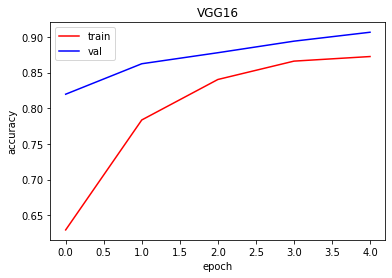

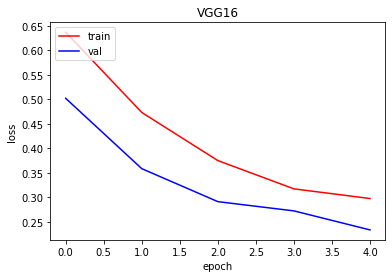

<Figure size 432x288 with 0 Axes>

In [44]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('VGG16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('VGG16')
plt.figure()

<Figure size 432x288 with 0 Axes>

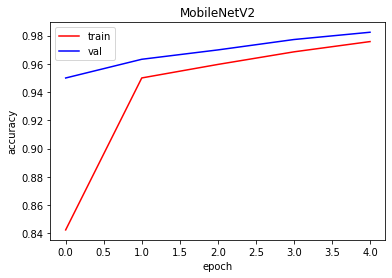

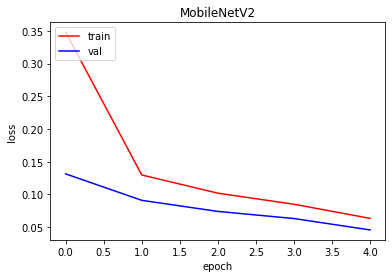

<Figure size 432x288 with 0 Axes>

In [45]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('MobileNetV2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('MobileNetV2')
plt.figure()
     

<Figure size 432x288 with 0 Axes>

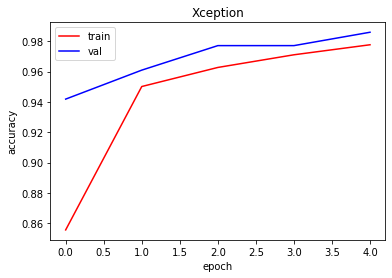

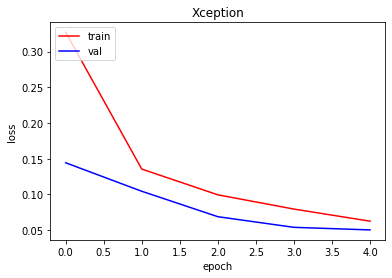

<Figure size 432x288 with 0 Axes>

In [46]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Xception')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Xception')
plt.figure()
     

<Figure size 432x288 with 0 Axes>

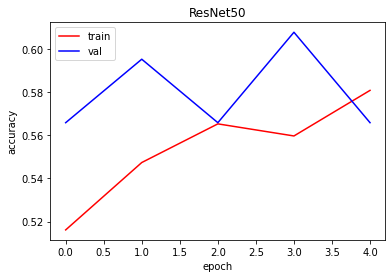

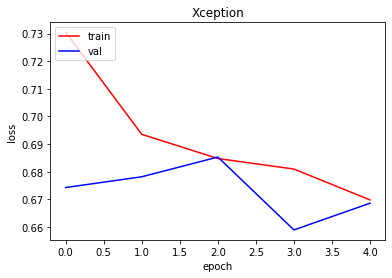

<Figure size 432x288 with 0 Axes>

In [47]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('ResNet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Xception')
plt.figure()
     

<Figure size 432x288 with 0 Axes>

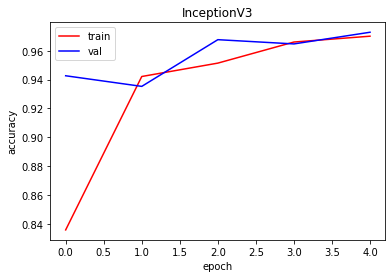

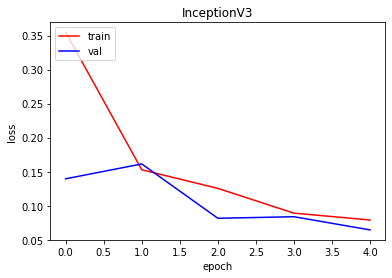

<Figure size 432x288 with 0 Axes>

In [48]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('InceptionV3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('InceptionV3')
plt.figure()
     

<Figure size 432x288 with 0 Axes>

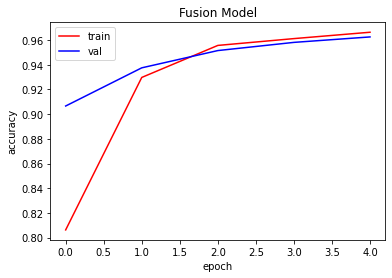

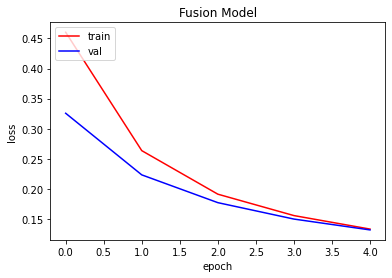

<Figure size 432x288 with 0 Axes>

In [49]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Fusion Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Fusion Model')
plt.figure()
     

In [50]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    #print(image.shape)
    plt.imshow(image)

In [51]:
def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model2.predict(image)
    return preds

In [52]:
def fresh_or_rotten(image_path):
    preds = make_predictions(image_path)
    print(preds)
    if preds <= 0.5:
        print("The fruit is fresh")
    else:
        print("The fruit is rotten")

[[0.99485517]]
The fruit is rotten


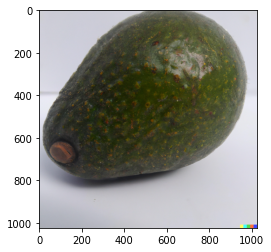

In [53]:
fresh_or_rotten('/kaggle/input/myfruitpictures/fresh_avocado_dalle.png')
#ada beberapa kasus yang membuat mesinnya salah baca

[[0.0021656]]
The fruit is fresh


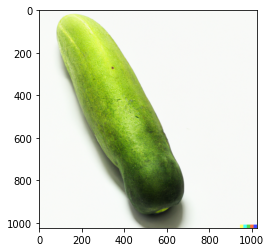

In [54]:
fresh_or_rotten('/kaggle/input/myfruitpictures/fresh_cucumber_dalle.png')

[[0.99788195]]
The fruit is rotten


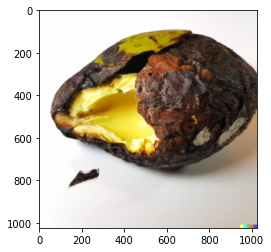

In [55]:
fresh_or_rotten('/kaggle/input/myfruitpictures/rotten_avocado_dalle.png')

[[0.9415383]]
The fruit is rotten


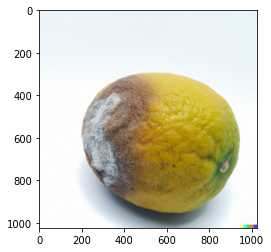

In [56]:
fresh_or_rotten('/kaggle/input/myfruitpictures/rotten_lemon_dalle.png')

[[0.23366159]]
The fruit is fresh


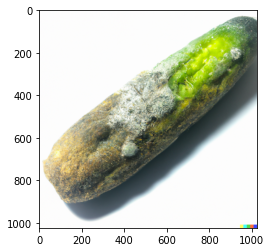

In [57]:
fresh_or_rotten('/kaggle/input/myfruitpictures/rotten_cucumber_dalle.png')

[[0.99788195]]
The fruit is rotten


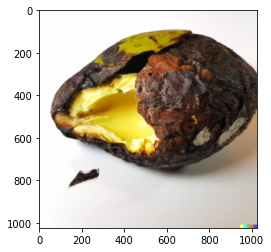

In [58]:
fresh_or_rotten('/kaggle/input/myfruitpictures/rotten_avocado_dalle.png')